In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0601.csv'
case0601 = pd.read_csv(path)
case0601.head()

,Score,Handicap
0,1.9,None
1,2.5,None
2,3.0,None
3,3.6,None
4,4.1,None


<Figure size 700x2000 with 0 Axes>

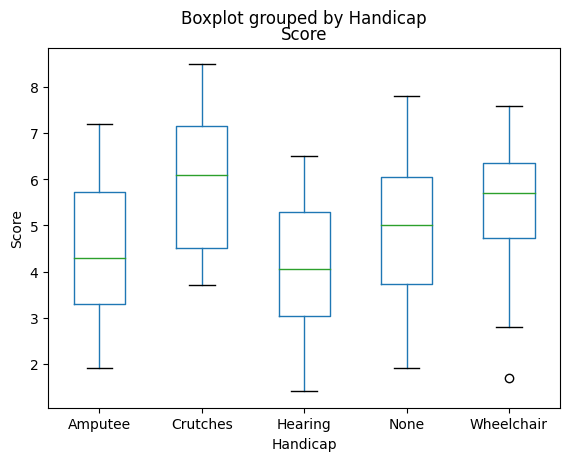

In [ ]:
# Create boxplot
plt.figure(figsize=(7, 20))
case0601.boxplot(column='Score', by='Handicap', grid=False)
plt.ylabel("Score")
plt.show()

In [ ]:
model1 = ols('Score ~ Handicap', data=case0601).fit()
anova_lm(model1)

,df,sum_sq,mean_sq,F,PR(>F)
Handicap,4.0,30.521429,7.630357,2.86158,0.030127
Residual,65.0,173.321429,2.666484,NaN,NaN


This is reasonable evidence that at least one group may be different.

In [ ]:
import statsmodels.stats.multicomp as mc

# Perform Tukey's range test
tukey_results = mc.MultiComparison(case0601["Score"], case0601["Handicap"]).tukeyhsd()

print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2   meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 Amputee   Crutches   1.4929 0.1233 -0.2389  3.2246  False
 Amputee    Hearing  -0.3786 0.9725 -2.1103  1.3532  False
 Amputee       None   0.4714   0.94 -1.2603  2.2032  False
 Amputee Wheelchair   0.9143 0.5781 -0.8174   2.646  False
Crutches    Hearing  -1.8714 0.0278 -3.6032 -0.1397   True
Crutches       None  -1.0214 0.4686 -2.7532  0.7103  False
Crutches Wheelchair  -0.5786 0.8812 -2.3103  1.1532  False
 Hearing       None     0.85 0.6443 -0.8817  2.5817  False
 Hearing Wheelchair   1.2929 0.2348 -0.4389  3.0246  False
    None Wheelchair   0.4429 0.9517 -1.2889  2.1746  False
----------------------------------------------------------


In [ ]:
tukey_results = pairwise_tukeyhsd(case0601["Score"], case0601["Handicap"])
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2   meandiff p-adj   lower   upper  reject
----------------------------------------------------------
 Amputee   Crutches   1.4929 0.1233 -0.2389  3.2246  False
 Amputee    Hearing  -0.3786 0.9725 -2.1103  1.3532  False
 Amputee       None   0.4714   0.94 -1.2603  2.2032  False
 Amputee Wheelchair   0.9143 0.5781 -0.8174   2.646  False
Crutches    Hearing  -1.8714 0.0278 -3.6032 -0.1397   True
Crutches       None  -1.0214 0.4686 -2.7532  0.7103  False
Crutches Wheelchair  -0.5786 0.8812 -2.3103  1.1532  False
 Hearing       None     0.85 0.6443 -0.8817  2.5817  False
 Hearing Wheelchair   1.2929 0.2348 -0.4389  3.0246  False
    None Wheelchair   0.4429 0.9517 -1.2889  2.1746  False
----------------------------------------------------------


In [ ]:
mean_diffs = tukey_results.meandiffs
conf_int_lower = tukey_results.confint[:, 0]
conf_int_upper = tukey_results.confint[:, 1]
group_names = tukey_results.groupsunique

In [ ]:
from itertools import combinations
 # Generate combinations of two elements
group_pairs = list(combinations(group_names, 2))
group_names = []
for x in group_pairs:
  print(x[0]+'_'+x[1])
  group_names.append(x[0]+'_'+x[1])

Amputee_Crutches
Amputee_Hearing
Amputee_None
Amputee_Wheelchair
Crutches_Hearing
Crutches_None
Crutches_Wheelchair
Hearing_None
Hearing_Wheelchair
None_Wheelchair


In [ ]:
group_names

['Amputee_Crutches',
 'Amputee_Hearing',
 'Amputee_None',
 'Amputee_Wheelchair',
 'Crutches_Hearing',
 'Crutches_None',
 'Crutches_Wheelchair',
 'Hearing_None',
 'Hearing_Wheelchair',
 'None_Wheelchair']

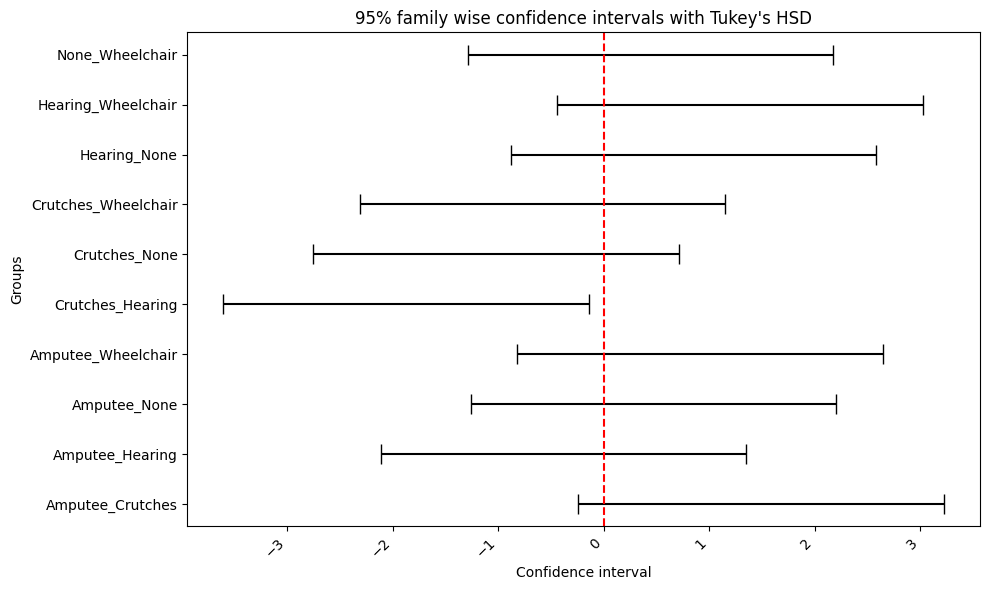

In [ ]:
plt.figure(figsize=(10, 6))

# Calculate the absolute differences for error bars
error_bars_lower = [mean_diff - conf_int_lower for mean_diff, conf_int_lower in zip(mean_diffs, conf_int_lower)]
error_bars_upper = [conf_int_upper - mean_diff for mean_diff, conf_int_upper in zip(mean_diffs, conf_int_upper)]


plt.errorbar(mean_diffs, group_names, xerr=[error_bars_lower, error_bars_upper], fmt='none', ecolor='black', capsize=7)

# Add dashed vertical line at x = 0
plt.axvline(x=0, linestyle='--', color='red')


# Set labels and title
plt.xlabel("Confidence interval")
plt.ylabel("Groups")
plt.title("95% family wise confidence intervals with Tukey's HSD")

# Adjust layout and display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind

model = ols('Score ~ Handicap', data=case0601).fit()

# Perform pairwise comparisons with Bonferroni adjustment
mc = MultiComparison(case0601['Score'], case0601['Handicap'])
result = mc.allpairtest(ttest_ind, method='bonferroni')

# Print adjusted p-values
print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonferroni
alphacSidak=0.01, alphacBonf=0.005
 group1    group2     stat   pval  pval_corr reject
---------------------------------------------------
 Amputee   Crutches -2.5737 0.0161    0.1611  False
 Amputee    Hearing  0.6423 0.5263       1.0  False
 Amputee       None -0.7368 0.4678       1.0  False
 Amputee Wheelchair -1.4494 0.1592       1.0  False
Crutches    Hearing  3.2847 0.0029    0.0292   True
Crutches       None  1.6427 0.1125       1.0  False
Crutches Wheelchair  0.9446 0.3536       1.0  False
 Hearing       None -1.3481 0.1893       1.0  False
 Hearing Wheelchair -2.0807 0.0475    0.4746  False
    None Wheelchair -0.6616 0.5141       1.0  False
---------------------------------------------------


In [ ]:
from scipy.stats import t, f
from statsmodels.stats.libqsturng import qsturng

# Degrees of freedom
df = 65

# 1. LSD multiplier
lsd_multiplier = t.ppf(1 - 0.05 / 2, df)
print("LSD multiplier:", lsd_multiplier)

# 2. Bonferroni multiplier
bonferroni_multiplier = t.ppf(1 - 0.05 / 20, df)
print("Bonferroni multiplier:", bonferroni_multiplier)

# 3. Tukey multiplier
tukey_multiplier =  qsturng(1 - 0.05, 5, 65)/np.sqrt(2)

print("Tukey multiplier:", tukey_multiplier)

# 4. Scheffe multiplier
scheffe_multiplier = np.sqrt((5 - 1) * f.ppf(1 - 0.05, 5 - 1, df))
print("Scheffe multiplier:", scheffe_multiplier)


LSD multiplier: 1.9971379077520122
Bonferroni multiplier: 2.90601528695731
Tukey multiplier: 2.8058089376888256
Scheffe multiplier: 3.170514214493284


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind, mannwhitneyu


path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/ex0523.csv'
ex0523 = pd.read_csv(path)
ex0523.head()

,Oxygen,Bone
0,11.10,Bone1
1,11.22,Bone1
2,11.29,Bone1
3,11.49,Bone1
4,11.32,Bone2


In [ ]:
ex0523["Bone"].nunique()

12

In [ ]:
# Fit the ANOVA model
model = ols('Oxygen ~ Bone', data=ex0523).fit()
anova_table = anova_lm(model)
print(anova_table)

            df    sum_sq  mean_sq         F        PR(>F)
Bone      11.0  6.067491  0.55159  7.426843  9.729915e-07
Residual  40.0  2.970792  0.07427       NaN           NaN


In [ ]:
# Perform Tukey's HSD post-hoc test
# Generally the best option
tukey_results = MultiComparison(ex0523['Oxygen'], ex0523['Bone']).tukeyhsd()
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Bone1 Bone10  -0.1433 0.9995 -0.7533  0.4667  False
 Bone1 Bone11    0.279 0.9241 -0.3549  0.9129  False
 Bone1 Bone12    0.905 0.0008  0.2711  1.5389   True
 Bone1  Bone2   0.2017 0.9976 -0.5201  0.9234  False
 Bone1  Bone3    0.535 0.3293 -0.1868  1.2568  False
 Bone1  Bone4   -0.219 0.9861 -0.8529  0.4149  False
 Bone1  Bone5    0.073    1.0 -0.5609  0.7069  False
 Bone1  Bone6   0.6125 0.0991 -0.0557  1.2807  False
 Bone1  Bone7    0.487 0.2806 -0.1469  1.1209  False
 Bone1  Bone8    0.495 0.3302 -0.1732  1.1632  False
 Bone1  Bone9   0.5483 0.2954 -0.1734  1.2701  False
Bone10 Bone11   0.4223 0.3354 -0.1499  0.9946  False
Bone10 Bone12   1.0483    0.0  0.4761  1.6206   True
Bone10  Bone2    0.345 0.8135 -0.3232  1.0132  False
Bone10  Bone3   0.6783 0.0439  0.0101  1.3466   True
Bone10  Bone4  -0.0757    1.0 -0.6479  0.4966 

In [ ]:
# Bonferroni correction with t-test
pairwise_t_test_results = MultiComparison(ex0523['Oxygen'], ex0523['Bone']).allpairtest(ttest_ind, method='bonf')
print(pairwise_t_test_results[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 Bone1 Bone10  1.3477 0.2147       1.0  False
 Bone1 Bone11 -2.1013 0.0737       1.0  False
 Bone1 Bone12 -7.5199 0.0001    0.0089   True
 Bone1  Bone2 -1.4537 0.2058       1.0  False
 Bone1  Bone3 -3.6645 0.0145    0.9588  False
 Bone1  Bone4  1.2367 0.2561       1.0  False
 Bone1  Bone5 -0.4133 0.6918       1.0  False
 Bone1  Bone6  -4.815  0.003     0.195  False
 Bone1  Bone7 -2.0824 0.0758       1.0  False
 Bone1  Bone8 -2.4815 0.0477       1.0  False
 Bone1  Bone9 -3.4885 0.0175       1.0  False
Bone10 Bone11 -3.6357 0.0054    0.3588  False
Bone10 Bone12 -9.7756    0.0    0.0003   True
Bone10  Bone2   -2.74 0.0289       1.0  False
Bone10  Bone3 -5.1843 0.0013    0.0841  False
Bone10  Bone4  0.5079 0.6237       1.0  False
Bone10  Bone5 -1.4553 0.1796       1.0  False
Bone10  Bone6 -6.6085 0.0002    0

In [ ]:
# Bonferroni correction with Wilcoxon test
pairwise_wilcoxon_results = MultiComparison(ex0523['Oxygen'], ex0523['Bone']).allpairtest(mannwhitneyu, method='bonf')
print(pairwise_wilcoxon_results[0])

Test Multiple Comparison mannwhitneyu 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1 group2 stat  pval  pval_corr reject
------------------------------------------
 Bone1 Bone10 18.0 0.2571       1.0  False
 Bone1 Bone11  2.0 0.0635       1.0  False
 Bone1 Bone12  0.0 0.0159       1.0  False
 Bone1  Bone2  2.0 0.2286       1.0  False
 Bone1  Bone3  0.0 0.0571       1.0  False
 Bone1  Bone4 14.0 0.4127       1.0  False
 Bone1  Bone5  8.0 0.7302       1.0  False
 Bone1  Bone6  0.0 0.0286       1.0  False
 Bone1  Bone7  2.0 0.0635       1.0  False
 Bone1  Bone8  1.0 0.0571       1.0  False
 Bone1  Bone9  0.0 0.0571       1.0  False
Bone10 Bone11  1.0 0.0087    0.5714  False
Bone10 Bone12  0.0 0.0043    0.2857  False
Bone10  Bone2  1.0 0.0476       1.0  False
Bone10  Bone3  0.0 0.0238       1.0  False
Bone10  Bone4 16.5 0.8548       1.0  False
Bone10  Bone5  9.0  0.329       1.0  False
Bone10  Bone6  0.0 0.0095    0.6286  False
Bone10  Bone7  1.0 0.0087    0.5714  False
B

In [ ]:
!pip install scikit-posthocs

In [ ]:
from scikit_posthocs import posthoc_scheffe

posthoc_scheffe(ex0523, val_col='Oxygen', group_col='Bone')

,Bone1,Bone2,Bone3,Bone4,Bone5,Bone6,Bone7,Bone8,Bone9,Bone10,Bone11,Bone12
Bone1,1.000000,0.999942,0.816857,0.999534,1.000000,0.532431,0.779362,0.817478,0.791550,0.999990,0.995741,0.032072
Bone2,0.999942,1.000000,0.996379,0.945000,0.999999,0.966199,0.997545,0.997895,0.994910,0.983942,1.000000,0.361107
Bone3,0.816857,0.996379,1.000000,0.257384,0.898434,1.000000,1.000000,1.000000,1.000000,0.367294,0.999088,0.978451
Bone4,0.999534,0.945000,0.257384,1.000000,0.989709,0.071936,0.160629,0.216767,0.233575,1.000000,0.677037,0.000776
Bone5,1.000000,0.999999,0.898434,0.989709,1.000000,0.646851,0.875085,0.901915,0.879243,0.998912,0.999544,0.041427
Bone6,0.532431,0.966199,1.000000,0.071936,0.646851,1.000000,0.999998,1.000000,1.000000,0.114207,0.981389,0.993612
Bone7,0.779362,0.997545,1.000000,0.160629,0.875085,0.999998,1.000000,1.000000,1.000000,0.246105,0.999500,0.867811
Bone8,0.817478,0.997895,1.000000,0.216767,0.901915,1.000000,1.000000,1.000000,1.000000,0.320171,0.999591,0.918327
Bone9,0.791550,0.994910,1.000000,0.233575,0.879243,1.000000,1.000000,1.000000,1.000000,0.336878,0.998543,0.983816
Bone10,0.999990,0.983942,0.367294,1.000000,0.998912,0.114207,0.246105,0.320171,0.336878,1.000000,0.821065,0.001192


In [ ]:
from scikit_posthocs import posthoc_mannwhitney

posthoc_mannwhitney(ex0523, val_col='Oxygen', group_col='Bone', p_adjust = 'bonferroni')

,Bone1,Bone10,Bone11,Bone12,Bone2,Bone3,Bone4,Bone5,Bone6,Bone7,Bone8,Bone9
Bone1,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.0
Bone10,1.0,1.000000,0.571429,0.285714,1.0,1.0,1.00000,1.00000,0.628571,0.571429,1.0,1.0
Bone11,1.0,0.571429,1.000000,0.523810,1.0,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.0
Bone12,1.0,0.285714,0.523810,1.000000,1.0,1.0,0.52381,0.52381,1.000000,1.000000,1.0,1.0
Bone2,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.0
Bone3,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.0
Bone4,1.0,1.000000,1.000000,0.523810,1.0,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.0
Bone5,1.0,1.000000,1.000000,0.523810,1.0,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.0
Bone6,1.0,0.628571,1.000000,1.000000,1.0,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.0
Bone7,1.0,0.571429,1.000000,1.000000,1.0,1.0,1.00000,1.00000,1.000000,1.000000,1.0,1.0


In [ ]:
from scikit_posthocs import posthoc_dunnett

path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0601.csv'
case0601 = pd.read_csv(path)
case0601.head()

,Score,Handicap
0,1.9,None
1,2.5,None
2,3.0,None
3,3.6,None
4,4.1,None


In [ ]:
posthoc_dunnett(case0601, val_col='Score', group_col = 'Handicap', control = 'None')

,None,Amputee,Crutches,Hearing,Wheelchair
None,1.0,0.859755,0.291788,0.451537,0.88358
Amputee,0.859755,NaN,NaN,NaN,NaN
Crutches,0.291788,NaN,NaN,NaN,NaN
Hearing,0.451537,NaN,NaN,NaN,NaN
Wheelchair,0.88358,NaN,NaN,NaN,NaN


# Contrasts

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats

path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0601.csv'
case0601 = pd.read_csv(path)
case0601.head()

,Score,Handicap
0,1.9,None
1,2.5,None
2,3.0,None
3,3.6,None
4,4.1,None


In [ ]:
grp_summary = case0601.groupby('Handicap')['Score'].describe()
grp_summary

,count,mean,std,min,25%,50%,75%,max
Handicap,,,,,,,,
Amputee,14.0,4.428571,1.585719,1.9,3.300,4.30,5.725,7.2
Crutches,14.0,5.921429,1.481776,3.7,4.500,6.10,7.150,8.5
Hearing,14.0,4.050000,1.532595,1.4,3.025,4.05,5.300,6.5
None,14.0,4.900000,1.793578,1.9,3.725,5.00,6.050,7.8
Wheelchair,14.0,5.342857,1.748280,1.7,4.725,5.70,6.350,7.6


compute the contrast between the wheelchair and crutches mean and the amputee and hearing means.

$\it{H_0}:  -\frac{1}{2}\mu_{amputee}+\frac{1}{2}\mu_{crutches} -\frac{1}{2}\mu_{hearing}+0\mu_{none}+\frac{1}{2}\mu_{wheelchair}=0$

$\it{H_1}:  -\frac{1}{2}\mu_{amputee}+\frac{1}{2}\mu_{crutches} -\frac{1}{2}\mu_{hearing}+0\mu_{none}+\frac{1}{2}\mu_{wheelchair}\neq0$

The coefficients for the linear combination are $C_1 = -\frac{1}{2}$, $C_2 = \frac{1}{2}$, $C_3 = -\frac{1}{2}$, $C_4 = 0$, $C_5 = \frac{1}{2}$.



In [ ]:
model1 = ols('Score ~ Handicap', data=case0601).fit()
anova_lm(model1)

,df,sum_sq,mean_sq,F,PR(>F)
Handicap,4.0,30.521429,7.630357,2.86158,0.030127
Residual,65.0,173.321429,2.666484,NaN,NaN


This is reasonable evidence that at least one group may be different.

In [ ]:
num = ((grp_summary['count'] - 1) * grp_summary['std'] ** 2).sum()
dof = grp_summary['count'].sum() - len(grp_summary)
sp = np.sqrt(num / dof)
print(sp, dof)

1.6329370828306633 65.0


In [ ]:
#Estimate the linear combination.
grp_summary['C1'] = [-0.5, 0.5, -0.5, 0, 0.5]
grp_summary

,count,mean,std,min,25%,50%,75%,max,C1
Handicap,,,,,,,,,
Amputee,14.0,4.428571,1.585719,1.9,3.300,4.30,5.725,7.2,-0.5
Crutches,14.0,5.921429,1.481776,3.7,4.500,6.10,7.150,8.5,0.5
Hearing,14.0,4.050000,1.532595,1.4,3.025,4.05,5.300,6.5,-0.5
None,14.0,4.900000,1.793578,1.9,3.725,5.00,6.050,7.8,0.0
Wheelchair,14.0,5.342857,1.748280,1.7,4.725,5.70,6.350,7.6,0.5


In [ ]:
#Find the standard error of the estimate.
se1 = sp * np.sqrt((grp_summary['C1'] ** 2 / grp_summary['count']).sum())
se1

0.4364207927221745

In [ ]:
g1 = (grp_summary['mean'] * grp_summary['C1']).sum()
g1

1.3928571428571423

In [ ]:
#Construct a 95% confidence interval.
scipy.stats.t.interval(0.95, dof, loc=g1, scale=se1)

(0.5212646339805043, 2.2644496517337807)

In [ ]:
t_value = g1/se1
#two sided p - value
p_value = (1- scipy.stats.t.cdf(np.abs(t_value), dof, loc=0, scale=1))*2
p_value

0.0021806474507177764

In [ ]:
grp_summary

,count,mean,std,min,25%,50%,75%,max,C1
Handicap,,,,,,,,,
Amputee,14.0,4.428571,1.585719,1.9,3.300,4.30,5.725,7.2,-0.5
Crutches,14.0,5.921429,1.481776,3.7,4.500,6.10,7.150,8.5,0.5
Hearing,14.0,4.050000,1.532595,1.4,3.025,4.05,5.300,6.5,-0.5
None,14.0,4.900000,1.793578,1.9,3.725,5.00,6.050,7.8,0.0
Wheelchair,14.0,5.342857,1.748280,1.7,4.725,5.70,6.350,7.6,0.5


In [ ]:
#Estimate the linear combination.
#Compares Amputee & Wheelchair to hearing and crutches
grp_summary['C2'] = [0.5, -0.5, -0.5, 0, 0.5]
grp_summary

,count,mean,std,min,25%,50%,75%,max,C1,C2
Handicap,,,,,,,,,,
Amputee,14.0,4.428571,1.585719,1.9,3.300,4.30,5.725,7.2,-0.5,0.5
Crutches,14.0,5.921429,1.481776,3.7,4.500,6.10,7.150,8.5,0.5,-0.5
Hearing,14.0,4.050000,1.532595,1.4,3.025,4.05,5.300,6.5,-0.5,-0.5
None,14.0,4.900000,1.793578,1.9,3.725,5.00,6.050,7.8,0.0,0.0
Wheelchair,14.0,5.342857,1.748280,1.7,4.725,5.70,6.350,7.6,0.5,0.5


In [ ]:
#Find the standard error of the estimate.
se2 = sp * np.sqrt((grp_summary['C2'] ** 2 / grp_summary['count']).sum())
se2

0.4364207927221745

In [ ]:
g2 = (grp_summary['mean'] * grp_summary['C2']).sum()
g2

-0.09999999999999964

In [ ]:
#Construct a 95% confidence interval.
scipy.stats.t.interval(0.95, dof, loc=g2, scale=se2)

(-0.9715925088766377, 0.7715925088766384)

In [ ]:
t_value = g2/se2
t_value

-0.22913665358666732

In [ ]:
p_value = (1- scipy.stats.t.cdf(np.abs(t_value), dof, loc=0, scale=1))*2
p_value

0.8194821542156909

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats

path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0502.csv'
case0502 = pd.read_csv(path)
case0502.head()

,Percent,Judge
0,6.4,Spock's
1,8.7,Spock's
2,13.3,Spock's
3,13.6,Spock's
4,15.0,Spock's


In [ ]:
grp_summary = case0502.groupby('Judge')['Percent'].describe()
grp_summary

,count,mean,std,min,25%,50%,75%,max
Judge,,,,,,,,
A,5.0,34.120000,11.941817,16.8,30.800,33.60,40.500,48.9
B,6.0,33.616667,6.582224,27.0,29.675,32.35,34.800,45.6
C,9.0,29.100000,4.592929,21.0,27.500,30.50,32.500,33.8
D,2.0,27.000000,3.818377,24.3,25.650,27.00,28.350,29.7
E,6.0,26.966667,9.010142,17.7,20.150,24.70,33.075,40.2
F,9.0,26.800000,5.968878,16.5,23.500,26.70,29.800,36.2
Spock's,9.0,14.622222,5.038794,6.4,13.300,15.00,17.700,23.1


In [ ]:
num = ((grp_summary['count'] - 1) * grp_summary['std'] ** 2).sum()
dof = grp_summary['count'].sum() - len(grp_summary)
sp = np.sqrt(num / dof)
print(sp, dof)

6.9142091195803275 39.0


In [ ]:
#Estimate the linear combination.
#Compares Amputee & Wheelchair to hearing and crutches
grp_summary['C'] = [-1/6, -1/6, -1/6, -1/6, -1/6, -1/6, 1]
grp_summary

,count,mean,std,min,25%,50%,75%,max,C
Judge,,,,,,,,,
A,5.0,34.120000,11.941817,16.8,30.800,33.60,40.500,48.9,-0.166667
B,6.0,33.616667,6.582224,27.0,29.675,32.35,34.800,45.6,-0.166667
C,9.0,29.100000,4.592929,21.0,27.500,30.50,32.500,33.8,-0.166667
D,2.0,27.000000,3.818377,24.3,25.650,27.00,28.350,29.7,-0.166667
E,6.0,26.966667,9.010142,17.7,20.150,24.70,33.075,40.2,-0.166667
F,9.0,26.800000,5.968878,16.5,23.500,26.70,29.800,36.2,-0.166667
Spock's,9.0,14.622222,5.038794,6.4,13.300,15.00,17.700,23.1,1.000000


In [ ]:
#Find the standard error of the estimate.
se = sp * np.sqrt((grp_summary['C'] ** 2 / grp_summary['count']).sum())
g = (grp_summary['mean'] * grp_summary['C']).sum()

#Construct a 95% confidence interval.
CI = scipy.stats.t.interval(0.95, dof, loc=g, scale=se)

print("Confidence interval = ", CI)

t_value = g/se

p_value = (1- scipy.stats.t.cdf(np.abs(t_value), dof, loc=0, scale=1))*2

print("p_value = ", p_value)


Confidence interval =  (-20.321886058765603, -9.634780607901057)
p_value =  1.4890778345932887e-06
